# Prepare Exercise


In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from env import host, user, password

import warnings
warnings.filterwarnings("ignore")
from acquire import get_store_data
from acquire import get_power_data
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta, datetime



#  ACQUIRE

In [2]:
# Call the function to get the DataFrame.
store_df = get_store_data()

In [3]:
store_df = pd.read_csv('tsa_store.csv')

In [4]:
store_df.head().T

,0,1,2,3,4
store_id,1,1,1,1,1
item_id,1,1,1,1,1
sale_id,1,2,3,4,5
sale_date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
sale_amount,13,11,14,13,10
item_upc14,35200264013,35200264013,35200264013,35200264013,35200264013
item_upc12,35200264013,35200264013,35200264013,35200264013,35200264013
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84,0.84,0.84,0.84


In [5]:
# number of rows and columns
store_df.shape 


(10000, 14)

In [6]:
# number null values in each column
store_df.isnull().sum() 


store_id         0
item_id          0
sale_id          0
sale_date        0
sale_amount      0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [7]:
# unique values of  store_id
store_df.store_id.unique() 


array([1])

1. Convert date column to datetime format.

In [8]:
store_df.sale_date = pd.to_datetime(store_df.sale_date, infer_datetime_format=True)
store_df.head()

,store_id,item_id,sale_id,sale_date,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,1,1,1,2013-01-01,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,2,2013-01-02,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,3,2013-01-03,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,4,2013-01-04,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,5,2013-01-05,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


2. Plot the distribution of sale_amount and item_price.

Text(0.5, 1.0, 'Distribution of sale amount')

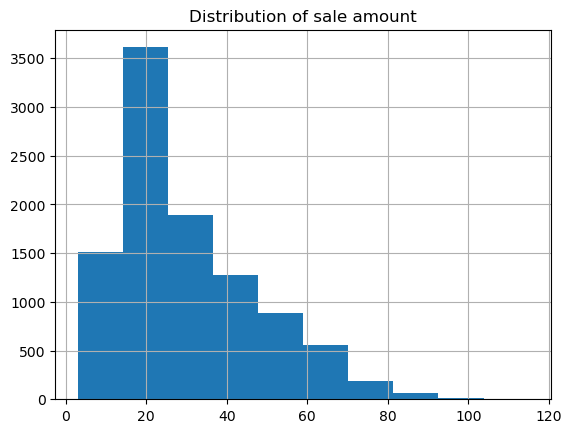

In [9]:
store_df.sale_amount.hist()
plt.title('Distribution of sale amount')


Text(0.5, 1.0, 'Distribution of item price')

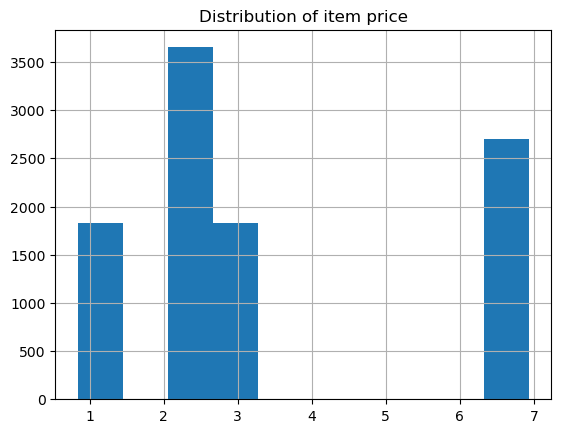

In [10]:
store_df.item_price.hist()
plt.title('Distribution of item price')


3. Set the index to be the datetime variable.

In [11]:
store_df=store_df.set_index('sale_date').sort_index()
# store_df.set_index('sale_date', inplace=True)
store_df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,1,3,36521,15,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,1,5,73041,11,759283100036,759283100036,Back To Nature,Back To Nature Gluten Free White Cheddar Rice ...,2.61,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,1,2,18261,33,11111065925,11111065925,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,1,6,91301,31,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


4. Add a 'month' and 'day of week' column to your dataframe.

In [12]:
store_df['month'] = store_df.index.month_name()
store_df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,1,3,36521,15,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,1,5,73041,11,759283100036,759283100036,Back To Nature,Back To Nature Gluten Free White Cheddar Rice ...,2.61,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,1,2,18261,33,11111065925,11111065925,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,1,6,91301,31,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January


In [13]:
store_df['day_of_week'] = store_df.index.day_name()
store_df.head

<bound method NDFrame.head of             store_id  item_id  sale_id  sale_amount    item_upc14  \
sale_date                                                           
2013-01-01         1        1        1           13   35200264013   
2013-01-01         1        3    36521           15   23923330139   
2013-01-01         1        5    73041           11  759283100036   
2013-01-01         1        2    18261           33   11111065925   
2013-01-01         1        6    91301           31   74170388732   
...              ...      ...      ...          ...           ...   
2017-12-31         1        5    74866           17  759283100036   
2017-12-31         1        4    56606           15  208528800007   
2017-12-31         1        3    38346           29   23923330139   
2017-12-31         1        2    20086           67   11111065925   
2017-12-31         1        1     1826           23   35200264013   

              item_upc12      item_brand  \
sale_date                   

5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
store_df['sales_total'] = store_df['sale_amount'] * store_df['item_price']
store_df.head()

,store_id,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,1,3,36521,15,23923330139,23923330139,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,36.45
2013-01-01,1,5,73041,11,759283100036,759283100036,Back To Nature,Back To Nature Gluten Free White Cheddar Rice ...,2.61,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,28.71
2013-01-01,1,2,18261,33,11111065925,11111065925,Caress,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,212.52
2013-01-01,1,6,91301,31,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,214.83


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

# Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

1.Convert date column to datetime format.

In [15]:
#Call the function to get the DataFrame.
power_data_df =get_power_data()


In [16]:
power_data_df_power = get_power_data()
power_data_df_power.head()


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
power_data_df_power.Date = pd.to_datetime(power_data_df_power.Date, infer_datetime_format=True)
power_data_df_power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2.Plot the distribution of each of your variables.

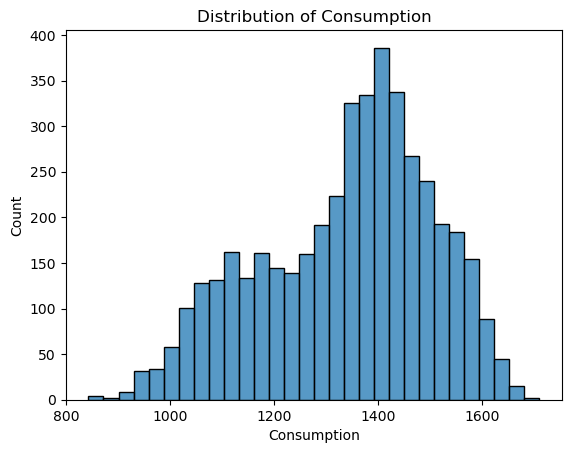

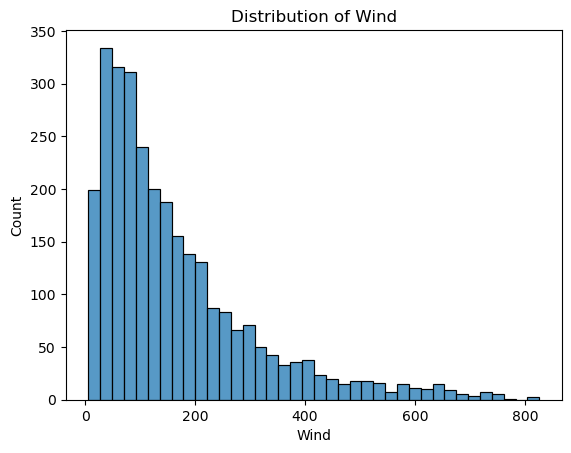

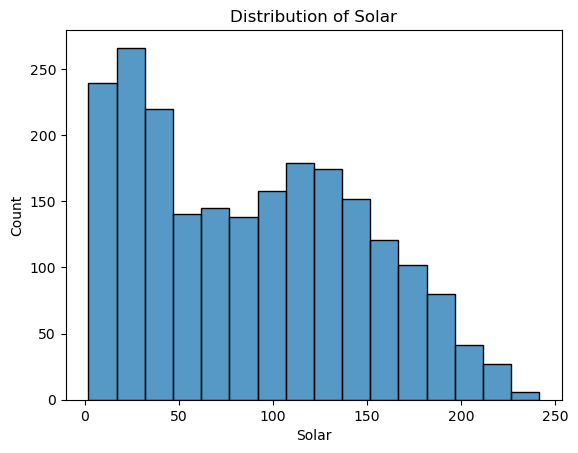

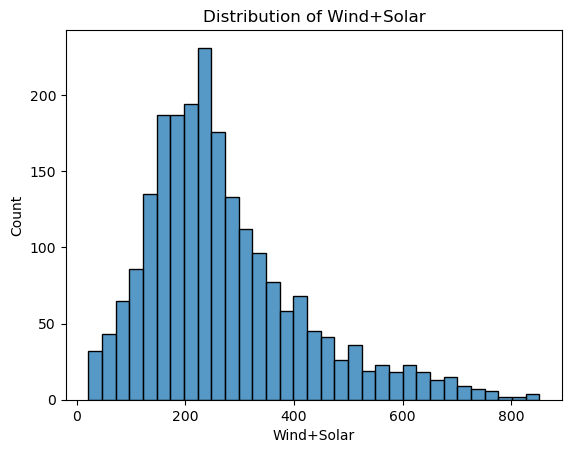

In [18]:
for col in list(power_data_df_power.columns.drop('Date')):
    plt.figure()
    sns.histplot(power_data_df_power[col])
    plt.title('Distribution of {}'.format(col))

3.Set the index to be the datetime variable.

In [19]:
power_data_df_power.set_index('Date', inplace=True)
power_data_df_power.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


4.Add a month and a year column to your dataframe.

In [20]:
power_data_df_power['month'] = power_data_df_power.index.strftime('%B')
power_data_df_power['year'] = power_data_df_power.index.strftime('%Y')
power_data_df_power.head()


,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


5.Fill any missing values.

In [21]:
for col in list(power_data_df_power.columns):
    print(col, power_data_df_power[col].isna().sum())


Consumption 0
Wind 1463
Solar 2195
Wind+Solar 2196
month 0
year 0


<Axes: xlabel='Date'>

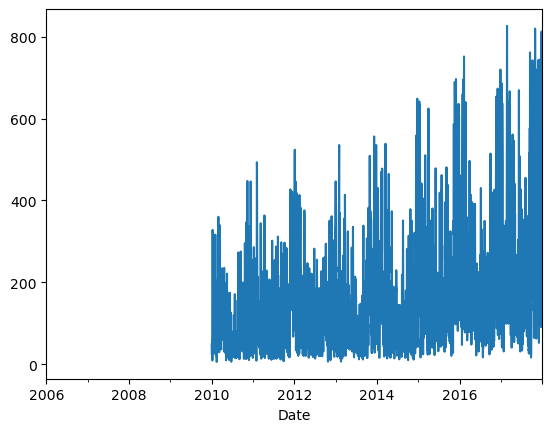

In [22]:
power_data_df_power.Wind.plot()

In [23]:
power_data_df_power.fillna(0, inplace=True)
power_data_df_power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


6.Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.